* [Data](#section1)
 * [Loading Data](#section1_1)
 * [Data information](#section1_2)
 * [Data Cleaning](#section1_3)
* [Exploratory Data Analysis](#section2)

### Data<a class='anchor' id ='section1'></a>

### Loading Data <a class="anchor" id = "section1_1"></a>
Data for this project was dowloaded from Kaggle:
[https://www.kaggle.com/datasets/awaiskaggler/insurance-csv](https://www.kaggle.com/datasets/awaiskaggler/insurance-csv)

Information regarding the features for the data are located in the Column section on the website.
Some code inspararion for this analysis was source from [Codecademy](Codecademy.com)

In [1]:
%matplotlib notebook
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import pearsonr,chi2_contingency,spearmanr,kstest
import scipy
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import warnings

In [2]:
dt = pd.read_csv('insurance.csv')
dt.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Infomation<a class="anchor" id="section1_2"></a>

In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
dt.isnull().count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [5]:
dt.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Some immediate insights are:

   * There are 7 columns and 1338 rows
   * Name and type of each column, almost values are integes and floats and the rest are objects
   * Dataset no missed any values, needn't to filling operations
   * Maybe data contain some oulier but we will handle it at Cleaning Data Section
   

In [6]:
round(dt.age.mean(),2)

39.21

In [7]:
dt.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [8]:
round(dt.bmi.mean(),3)

30.663

In [9]:
round(dt.charges.mean(),3)

13270.422

In [10]:
#count the number of patients with children
dt[dt['children']!=0]['children'].count()

764

In [11]:
#Count the number of patients who smoke
dt[dt['smoker']=='yes']['smoker'].count()

274

In [12]:
#Where do the patients mainly come from?
dt.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Infomation after general analysis:
  * There are `676` patients with male and `662` with female
  * Average `age` of the patients: `39.21`
  * Average `bmi` of the patients: `30.663`
  * Average charges of the patients: `13270.442`
  * The number of patients with `children`: `764`
  * The number of patients who `smoke`: `274`
  
Please note this information has `NOT` been cleaned and remove outlier values

In [13]:
dt.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Data Cleaning<a class='anchor' id='section1_3'></a>

In [14]:
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>


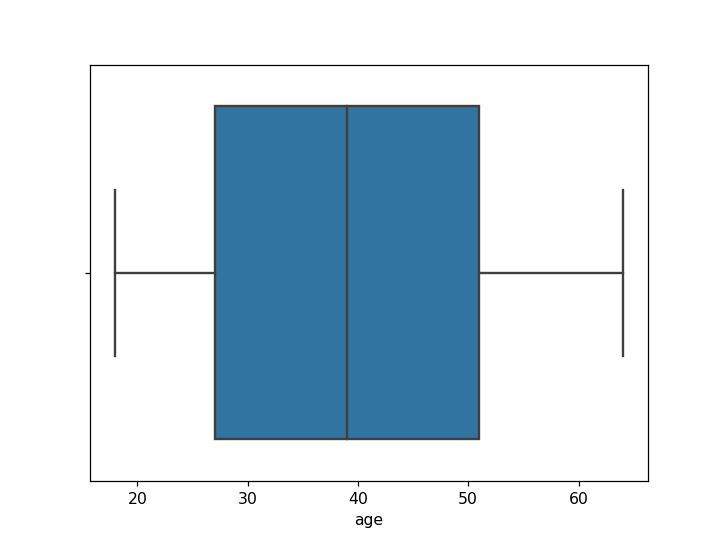

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [15]:
plt.figure()
sb.boxplot(dt['age'])
plt.show()

dt.age.describe()

<IPython.core.display.Javascript object>


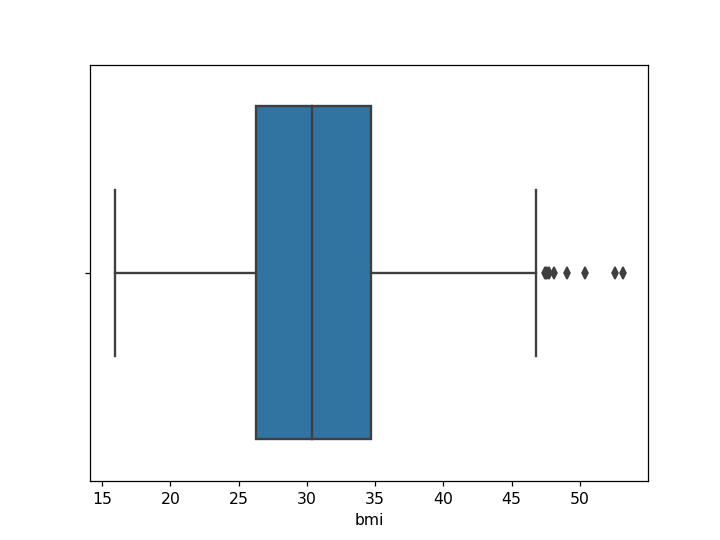

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [16]:
plt.figure()
sb.boxplot(dt['bmi'])
plt.show()

dt.bmi.describe()

In [17]:
#remove values above 45
dt = dt[dt.bmi < 45].reset_index()

<IPython.core.display.Javascript object>


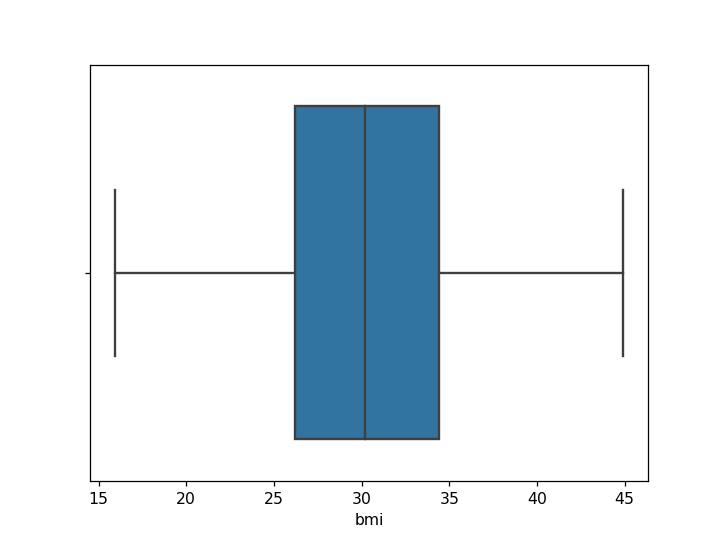

count    1318.000000
mean       30.407143
std         5.769454
min        15.960000
25%        26.205000
50%        30.210000
75%        34.400000
max        44.880000
Name: bmi, dtype: float64

In [18]:
plt.figure()
sb.boxplot(dt['bmi'])
plt.show()

dt.bmi.describe()

<IPython.core.display.Javascript object>


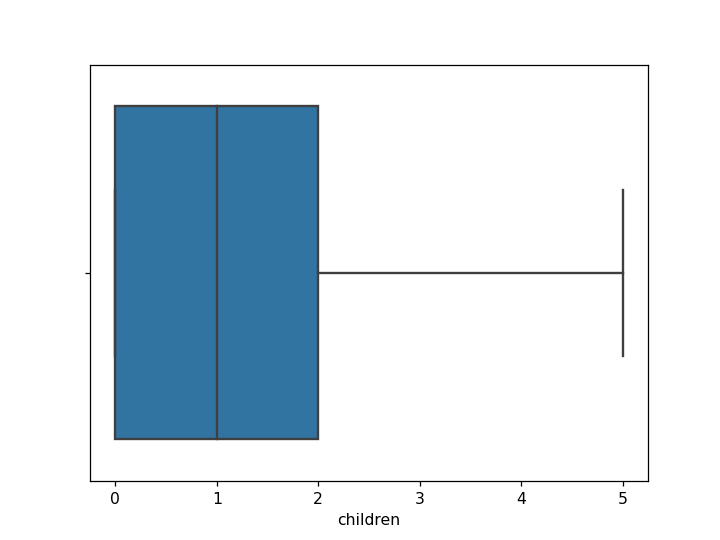

count    1318.000000
mean        1.089530
std         1.205352
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

In [19]:
plt.figure()
sb.boxplot(dt['children'])
plt.show()

dt.children.describe()

<IPython.core.display.Javascript object>


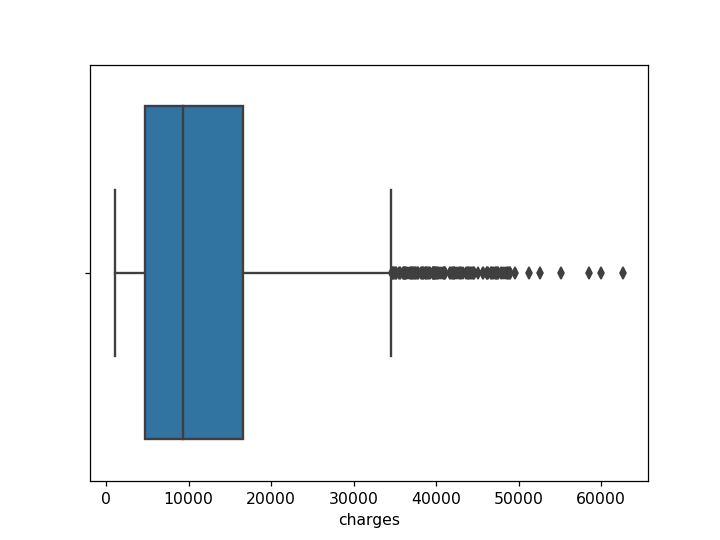

count     1318.000000
mean     13205.513244
std      11974.486056
min       1121.873900
25%       4740.287150
50%       9369.615750
75%      16639.912515
max      62592.873090
Name: charges, dtype: float64

In [20]:
plt.figure()
sb.boxplot(dt['charges'])
plt.show()

dt.charges.describe()

In [21]:
#remove values above 20000
dt=dt[dt.charges < 20000].reset_index()

<IPython.core.display.Javascript object>


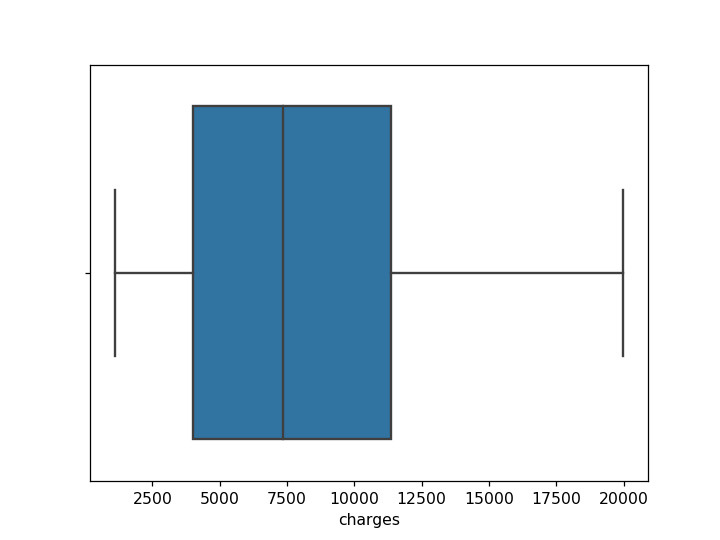

count     1050.000000
mean      7970.754563
std       4731.162405
min       1121.873900
25%       3988.404750
50%       7345.405300
75%      11365.284800
max      19964.746300
Name: charges, dtype: float64

In [22]:
plt.figure()
sb.boxplot(dt['charges'])
plt.show()

dt.charges.describe()

In [23]:
#remove first columns after reset index
dt.drop('level_0', axis=1, inplace=True)
dt

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.90,0,yes,southwest,16884.9240
1,1,18,male,33.77,1,no,southeast,1725.5523
2,2,28,male,33.00,3,no,southeast,4449.4620
3,4,32,male,28.88,0,no,northwest,3866.8552
4,5,31,female,25.74,0,no,southeast,3756.6216
...,...,...,...,...,...,...,...,...
1045,1332,52,female,44.70,3,no,southwest,11411.6850
1046,1333,50,male,30.97,3,no,northwest,10600.5483
1047,1334,18,female,31.92,0,no,northeast,2205.9808
1048,1335,18,female,36.85,0,no,southeast,1629.8335


In [24]:
del dt['index']
dt

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
3,32,male,28.88,0,no,northwest,3866.8552
4,31,female,25.74,0,no,southeast,3756.6216
...,...,...,...,...,...,...,...
1045,52,female,44.70,3,no,southwest,11411.6850
1046,50,male,30.97,3,no,northwest,10600.5483
1047,18,female,31.92,0,no,northeast,2205.9808
1048,18,female,36.85,0,no,southeast,1629.8335


In [25]:
dt.describe()

,age,bmi,children,charges
count,1050.000000,1050.000000,1050.000000,1050.000000
mean,38.342857,30.046757,1.077143,7970.754563
std,14.005466,5.818120,1.224454,4731.162405
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.810000,0.000000,3988.404750
50%,38.000000,29.865000,1.000000,7345.405300
75%,50.000000,33.915000,2.000000,11365.284800
max,64.000000,44.770000,5.000000,19964.746300


<IPython.core.display.Javascript object>


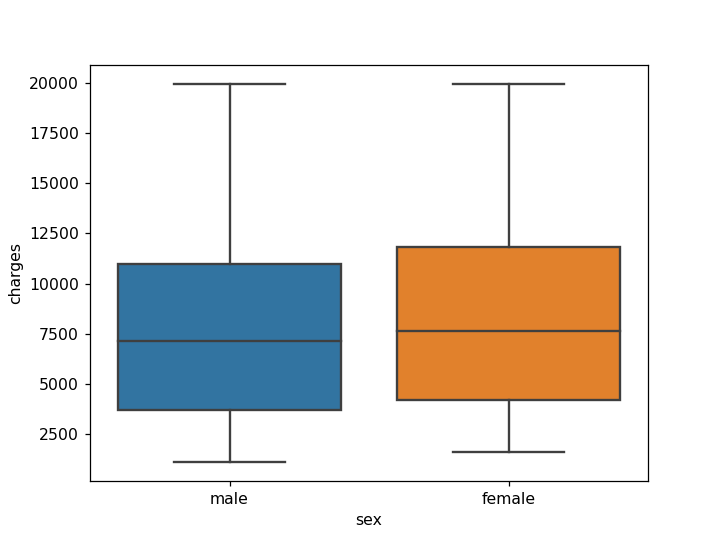

In [26]:
plt.figure()
sb.boxplot(x = dt.sex, y=dt.charges, 
            order=['male','female'])
plt.show()

There are `no significant difference` in `charges` between male and female

<IPython.core.display.Javascript object>


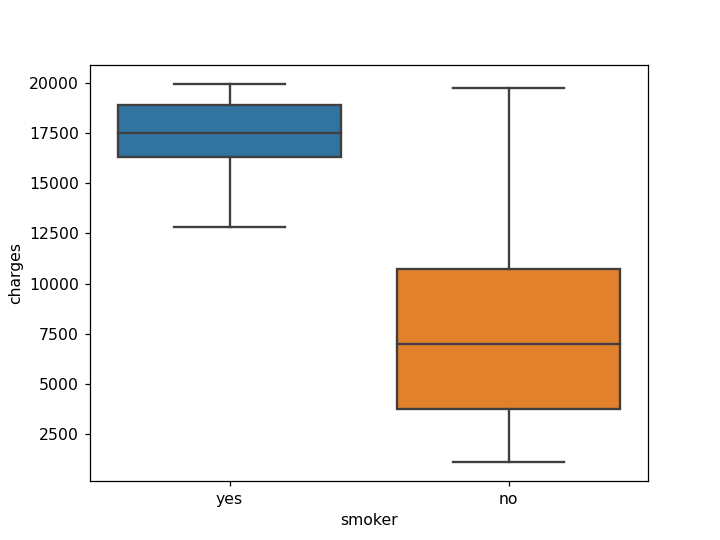

In [27]:
plt.figure()
sb.boxplot(x = dt.smoker, y=dt.charges, 
            order=['yes','no'])
plt.show()

Patients smoke must pay a higher charge(about 14000) than patients don't smoke(3000-11000)

<IPython.core.display.Javascript object>


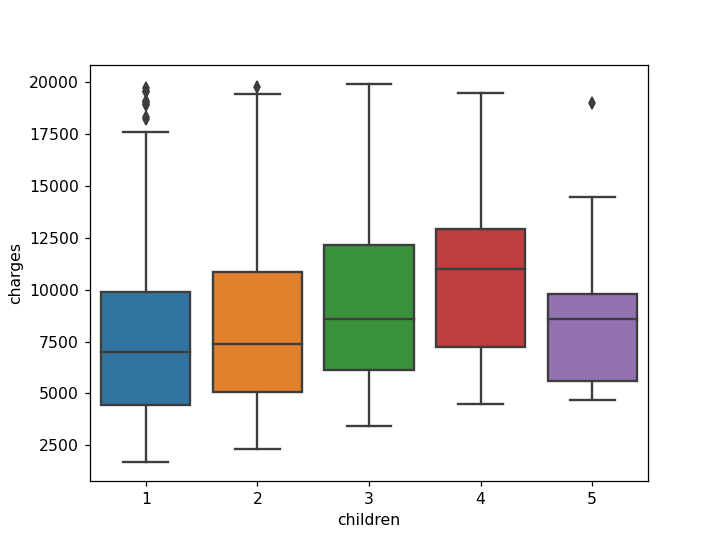

In [28]:
plt.figure()
sb.boxplot(x = dt.children, y=dt.charges, 
            order=[1,2,3,4,5])
plt.show()

### Exploratory Data Analysis<a class='anchor' id='section2'></a>

After some data cleaning and tidying, the DataFrame is ready for EDA. The following independent variable will be focused on in the analysis:

 * `charges`

The goal will be to see how these independent variables associate with the following dependent variables:

 * `age`
 * `bmi`
 * `children`
 * `smoker`
 
 The hope is that through summary statistics and visualizations the following question can be answered:
  * Does the `age`, `bmi`, number of `children` or `smoker` are related to patient's `charges`?

Along the way, this question may be refined and more questions may pop up.

In [29]:
#The age attribute is divided into 10 equal intervals and arranged from smallest to largest
d1 = (pd.cut(dt.age,10).value_counts()).sort_index()
d1

(17.954, 22.6]    188
(22.6, 27.2]      115
(27.2, 31.8]       94
(31.8, 36.4]      105
(36.4, 41.0]      105
(41.0, 45.6]       82
(45.6, 50.2]      102
(50.2, 54.8]       78
(54.8, 59.4]      102
(59.4, 64.0]       79
Name: age, dtype: int64

In [30]:
index_d1 = list(('17.95-22.6',\
                 '22.6-27.2',\
                 '27.2-31.8',\
                 '31.8-36.4',\
                 '36.4-41.0',\
                 '41.0-45.6',\
                 '45.6-50.2',\
                 '50.2-54.8',\
                 '54.8-59.4',\
                 '59.4-64.0'))
index_d1

['17.95-22.6',
 '22.6-27.2',
 '27.2-31.8',
 '31.8-36.4',
 '36.4-41.0',
 '41.0-45.6',
 '45.6-50.2',
 '50.2-54.8',
 '54.8-59.4',
 '59.4-64.0']

<IPython.core.display.Javascript object>


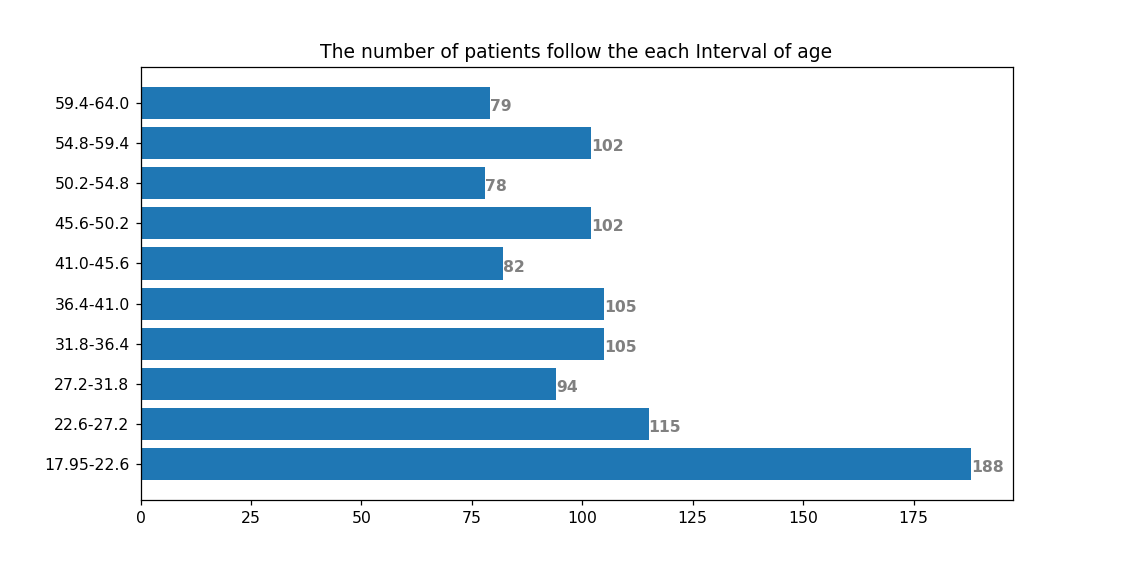

38.34285714285714

In [31]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(index_d1,d1.values)
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.2,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey')
ax.set_title('The number of patients follow the each Interval of age',
             loc='center' )
plt.show()
dt.age.mean()

The chart shows that patients aged `18-23` account for the most, about twice as many patients as average age of patients(`38.34`), which may have a significant impact on patient costs.

In [32]:
d2 = (pd.cut(dt.bmi,10).value_counts()).sort_index()
d2

(15.931, 18.841]     21
(18.841, 21.722]     58
(21.722, 24.603]    120
(24.603, 27.484]    151
(27.484, 30.365]    213
(30.365, 33.246]    177
(33.246, 36.127]    143
(36.127, 39.008]     83
(39.008, 41.889]     61
(41.889, 44.77]      23
Name: bmi, dtype: int64

In [33]:
index_d2= list(('15.931-18.841',\
                '18.841-21.722',\
                '21.722-24.603',\
                '24.603-27.484',\
                '27.484-30.365',\
                '30.365-33.246',\
                '33.246-36.127',\
                '36.127-39.008',\
                '39.008-41.889',\
                '41.889-44.77'))
index_d2

['15.931-18.841',
 '18.841-21.722',
 '21.722-24.603',
 '24.603-27.484',
 '27.484-30.365',
 '30.365-33.246',
 '33.246-36.127',
 '36.127-39.008',
 '39.008-41.889',
 '41.889-44.77']

<IPython.core.display.Javascript object>


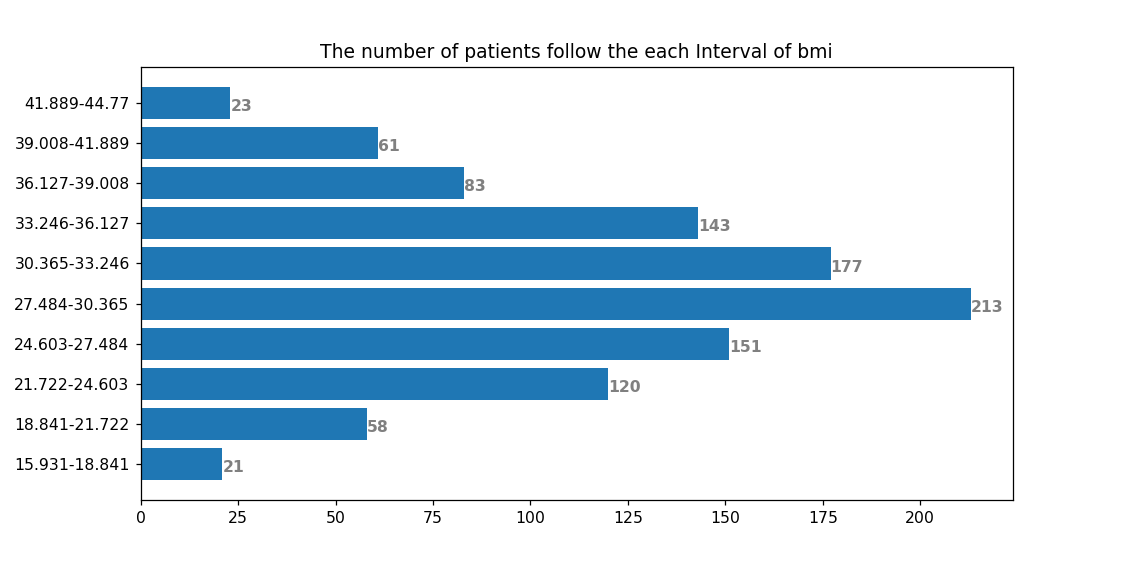

30.046757142857125

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(index_d2,d2.values)
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.2,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey')
ax.set_title('The number of patients follow the each Interval of bmi',
             loc='center' )
plt.show()
dt.bmi.mean()

The chart shows that the number of patients with BMI in the range `27.4-30.3` accounts for the most, only slightly higher than the number of patients with the average BMI(`30.04`).

<IPython.core.display.Javascript object>


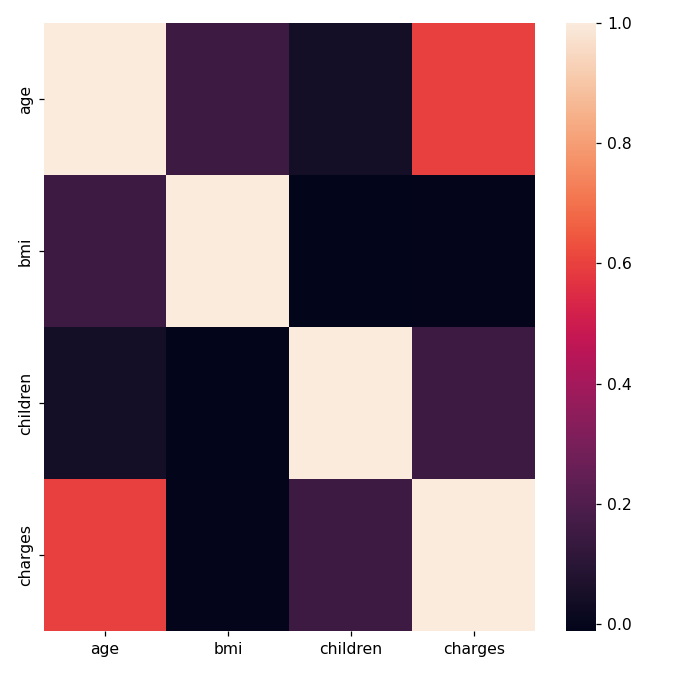

,age,bmi,children,charges
age,1.000000,0.149791,0.041204,0.599617
bmi,0.149791,1.000000,-0.012723,-0.006084
children,0.041204,-0.012723,1.000000,0.149354
charges,0.599617,-0.006084,0.149354,1.000000


In [35]:
plt.figure(figsize=(6,6))
# heat matrix that shows correlation across all numerical variables
sb.heatmap(data=dt.corr(),annot=False)
plt.tight_layout()
plt.show()
dt.corr()

We see that the relationship between `BMI` and `charges` is almost at the lowest level in the headmap, but there are few dependent variables, so we will use a `correlation test` to check whether it should be retained or not.

<IPython.core.display.Javascript object>


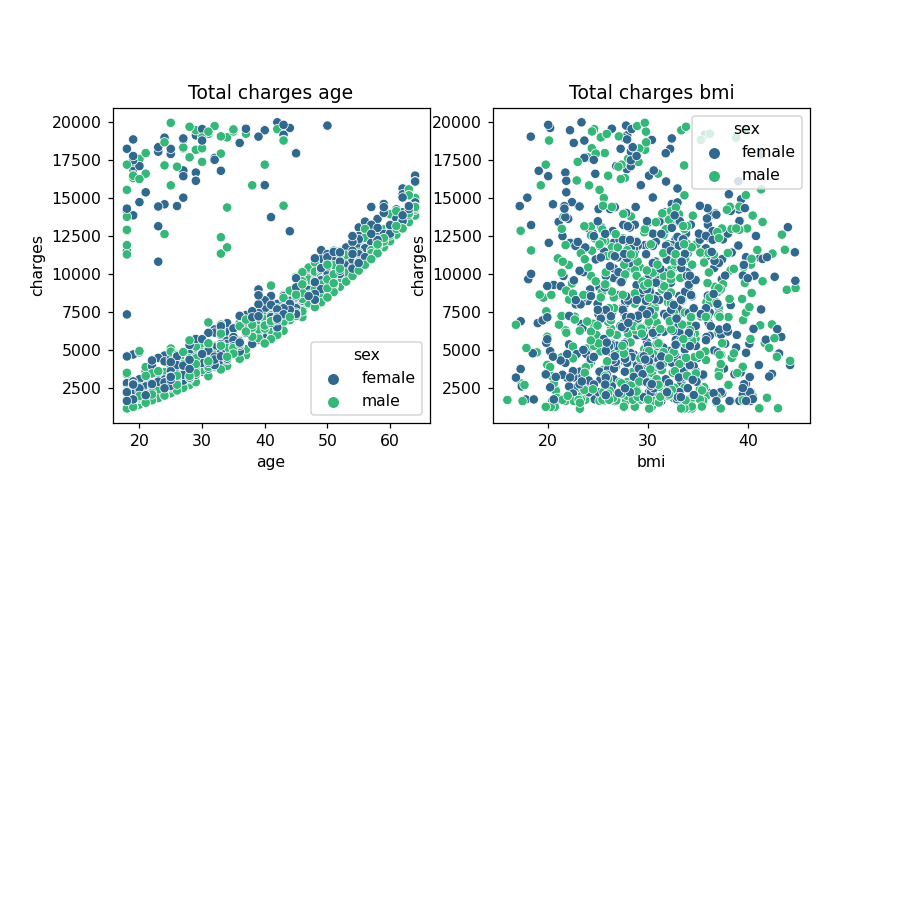

Text(0.5, 1.0, 'Total charges bmi')

In [36]:
list_quan =['age','bmi'] #quantitative variable
fig = plt.figure(figsize=(8,8))
ax= plt.subplot(2, 2, 1)
sb.scatterplot(x=dt.age, y= dt.charges, 
                hue=dt.sex, palette="viridis")
plt.title("Total charges age")
ax= plt.subplot(2, 2, 2)
sb.scatterplot(x=dt.bmi, y= dt.charges, 
                hue=dt.sex, palette="viridis")
plt.title("Total charges bmi")

* We are sure that patient age and charges are closely related
* The BMI indicator look like discrete with charges, make a correlation testing will clarify this

### Correlation Testing<a class='anchor' id='section2_1'></a>

In [37]:
r, pvalue = pearsonr(dt.bmi,dt.charges)
pvalue<0.05

False

In [38]:
r, pvalue = pearsonr(dt.age,dt.charges)
pvalue<0.05

True

In [39]:
r, pvalue = spearmanr(dt.children,dt.charges)
pvalue <0.05

True

In [40]:
r, pvalue = pearsonr(dt.bmi,dt.age)
pvalue <0.05

True

In [41]:
c,p,dof,e = chi2_contingency(pd.crosstab(dt.sex,dt.smoker))
p <0.05

False

In [42]:
c,p,dof,e = chi2_contingency(pd.crosstab(dt.region,dt.smoker))
p <0.05

False

### Hypothesis Testing<a class='anchor' id='section2_2'></a>
  * 